Let's import the necessary packages

In [177]:
# import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#set styles and figure inline
sns.set()
%matplotlib inline

In [178]:
# data urls
base_url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/'
confirmed_cases_data_url = base_url + 'time_series_covid19_confirmed_global.csv'
death_cases_data_url = base_url + 'time_series_covid19_deaths_global.csv'
recovery_cases_data_url = base_url + 'time_series_covid19_recovered_global.csv'

# import datasets as pandas dataframes
raw_data_confirmed = pd.read_csv(confirmed_cases_data_url)
raw_data_deaths = pd.read_csv(death_cases_data_url)
raw_data_recovered = pd.read_csv(recovery_cases_data_url)

# Confirmed cases of COVID-19

We first check out the confirmed cases data by looking at the head of the dataframe

In [179]:
raw_data_confirmed.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/6/20,4/7/20,4/8/20,4/9/20,4/10/20,4/11/20,4/12/20,4/13/20,4/14/20,4/15/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,367,423,444,484,521,555,607,665,714,784
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,377,383,400,409,416,433,446,467,475,494
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,1423,1468,1572,1666,1761,1825,1914,1983,2070,2160
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,525,545,564,583,601,601,638,646,659,673
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,16,17,19,19,19,19,19,19,19,19


In [180]:
raw_data_confirmed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264 entries, 0 to 263
Data columns (total 89 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Province/State  82 non-null     object 
 1   Country/Region  264 non-null    object 
 2   Lat             264 non-null    float64
 3   Long            264 non-null    float64
 4   1/22/20         264 non-null    int64  
 5   1/23/20         264 non-null    int64  
 6   1/24/20         264 non-null    int64  
 7   1/25/20         264 non-null    int64  
 8   1/26/20         264 non-null    int64  
 9   1/27/20         264 non-null    int64  
 10  1/28/20         264 non-null    int64  
 11  1/29/20         264 non-null    int64  
 12  1/30/20         264 non-null    int64  
 13  1/31/20         264 non-null    int64  
 14  2/1/20          264 non-null    int64  
 15  2/2/20          264 non-null    int64  
 16  2/3/20          264 non-null    int64  
 17  2/4/20          264 non-null    int

In [181]:
raw_data_confirmed.describe()

,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,4/6/20,4/7/20,4/8/20,4/9/20,4/10/20,4/11/20,4/12/20,4/13/20,4/14/20,4/15/20
count,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000,...,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000
mean,21.317326,22.168315,2.102273,2.477273,3.564394,5.431818,8.022727,11.087121,21.128788,23.356061,...,5095.079545,5401.878788,5723.878788,6042.992424,6408.026515,6710.280303,6994.996212,7262.571970,7485.571970,7788.083333
std,24.734994,70.669996,27.382118,27.480921,34.210982,47.612615,66.537101,89.647535,220.011922,221.352587,...,27466.891516,29364.316603,31408.470549,33419.461011,35633.968667,37520.876709,39320.047067,40906.810143,42450.795915,44263.148610
min,-51.796300,-135.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,6.969250,-20.026050,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,24.000000,25.750000,27.750000,29.500000,32.000000,33.750000,33.750000,39.500000,40.750000,48.000000
50%,23.488100,20.535638,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,221.000000,232.500000,246.000000,254.500000,256.500000,265.500000,276.000000,294.500000,304.000000,319.000000
75%,41.166075,78.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1049.750000,1128.750000,1189.250000,1233.750000,1269.250000,1305.500000,1314.250000,1352.000000,1379.750000,1407.500000
max,71.706900,178.065000,444.000000,444.000000,549.000000,761.000000,1058.000000,1423.000000,3554.000000,3554.000000,...,366667.000000,396223.000000,429052.000000,461437.000000,496535.000000,526396.000000,555313.000000,580619.000000,607670.000000,636350.000000


# Number of confirmed cases by country

Look at the head (or tail) of the dataframe again and notice that each row is the data for a particular province or state of a given country.

In [182]:
raw_data_confirmed.tail()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/6/20,4/7/20,4/8/20,4/9/20,4/10/20,4/11/20,4/12/20,4/13/20,4/14/20,4/15/20
259,Saint Pierre and Miquelon,France,46.885200,-56.315900,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
260,NaN,South Sudan,6.877000,31.307000,0,0,0,0,0,0,...,1,2,2,3,4,4,4,4,4,4
261,NaN,Western Sahara,24.215500,-12.885800,0,0,0,0,0,0,...,4,4,4,4,4,4,6,6,6,6
262,NaN,Sao Tome and Principe,0.186360,6.613081,0,0,0,0,0,0,...,4,4,4,4,4,4,4,4,4,4
263,NaN,Yemen,15.552727,48.516388,0,0,0,0,0,0,...,0,0,0,0,1,1,1,1,1,1


We want the numbers for each country though. So they want to think about this is, for each country, we want to take all the rows (*regions/provinces*) that correspond to that country and add up the numbers for each. To put this in data-analytics-speak, we want to **group by** the country column and sum up all the values for the other columns.

This is a common pattern in data analytics that we humans have been using for centuries. It was only formalized in 2011 by Hadley Wickam in his seminal paper [The Split-Apply-Combine Strategy for Data
Analysis](https://www.jstatsoft.org/article/view/v040i01). The pattern we are discussing now is the split-apply-combine and, in the case at hand we:

- Split the data into new datasets for each country
- Apply the function of "sum" for each new dataset (that is we add/sum the values for each column) to sum over territories/provinces/states for each country and
- Combine these datasets into a new dataframe

The pandas API has the groupby method, which allows us to do this.

**Side note:** For more on split-apply-combine and `pandas` check out [my post here](https://www.datacamp.com/community/tutorials/pandas-split-apply-combine-groupby).

In [183]:
# Group by region (also drop 'Lat', 'Long' as it doesn't make sense to sum them here)
confirmed_country = raw_data_confirmed.groupby(['Country/Region']).sum().drop(['Lat','Long'], axis=1)
confirmed_country.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,4/6/20,4/7/20,4/8/20,4/9/20,4/10/20,4/11/20,4/12/20,4/13/20,4/14/20,4/15/20
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,367,423,444,484,521,555,607,665,714,784
Albania,0,0,0,0,0,0,0,0,0,0,...,377,383,400,409,416,433,446,467,475,494
Algeria,0,0,0,0,0,0,0,0,0,0,...,1423,1468,1572,1666,1761,1825,1914,1983,2070,2160
Andorra,0,0,0,0,0,0,0,0,0,0,...,525,545,564,583,601,601,638,646,659,673
Angola,0,0,0,0,0,0,0,0,0,0,...,16,17,19,19,19,19,19,19,19,19


So each row of our new dataframe `confirmed country` is a time series of the number of confirmed cases of each country. Cool! Now a dataframe has an associated object called an index, which is essentially a set of unique identifiers for each row. Let's check out the index of `confirmed country`

In [184]:
confirmed_country.index

Index(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia', 'Austria',
       ...
       'United Kingdom', 'Uruguay', 'Uzbekistan', 'Venezuela', 'Vietnam',
       'West Bank and Gaza', 'Western Sahara', 'Yemen', 'Zambia', 'Zimbabwe'],
      dtype='object', name='Country/Region', length=185)

It's indexed by `Country\Region`. That's all good **but** if we index by date **intead**, it will allow us to produce some visualizations almost immediately. This is a nice aspect of the `pandas` API: you can make basic visualizations with it and, if your index consists of DateTimes, it knows you are plotting time series and plays nice with them. To make the index a set of dates, notice that the column names as the dates. To turn the column names into an index, we essentially want to make the columns the rows (and rows the columns). This corresponds to taking the transpose of the dataframe.

In [185]:
confirmed_country = confirmed_country.transpose()
confirmed_country.head()

Country/Region,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,...,United Kingdom,Uruguay,Uzbekistan,Venezuela,Vietnam,West Bank and Gaza,Western Sahara,Yemen,Zambia,Zimbabwe
1/22/20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1/23/20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,2,0,0,0,0,0
1/24/20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,2,0,0,0,0,0
1/25/20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,2,0,0,0,0,0
1/26/20,0,0,0,0,0,0,0,0,4,0,...,0,0,0,0,2,0,0,0,0,0


Let's have a look at the index to see whether it actually consists of Data Frames

In [186]:
confirmed_country.index

Index(['1/22/20', '1/23/20', '1/24/20', '1/25/20', '1/26/20', '1/27/20',
       '1/28/20', '1/29/20', '1/30/20', '1/31/20', '2/1/20', '2/2/20',
       '2/3/20', '2/4/20', '2/5/20', '2/6/20', '2/7/20', '2/8/20', '2/9/20',
       '2/10/20', '2/11/20', '2/12/20', '2/13/20', '2/14/20', '2/15/20',
       '2/16/20', '2/17/20', '2/18/20', '2/19/20', '2/20/20', '2/21/20',
       '2/22/20', '2/23/20', '2/24/20', '2/25/20', '2/26/20', '2/27/20',
       '2/28/20', '2/29/20', '3/1/20', '3/2/20', '3/3/20', '3/4/20', '3/5/20',
       '3/6/20', '3/7/20', '3/8/20', '3/9/20', '3/10/20', '3/11/20', '3/12/20',
       '3/13/20', '3/14/20', '3/15/20', '3/16/20', '3/17/20', '3/18/20',
       '3/19/20', '3/20/20', '3/21/20', '3/22/20', '3/23/20', '3/24/20',
       '3/25/20', '3/26/20', '3/27/20', '3/28/20', '3/29/20', '3/30/20',
       '3/31/20', '4/1/20', '4/2/20', '4/3/20', '4/4/20', '4/5/20', '4/6/20',
       '4/7/20', '4/8/20', '4/9/20', '4/10/20', '4/11/20', '4/12/20',
       '4/13/20', '4/14/20', '4/15

Note that `dtype = object` which means that these are strings, not DateTimes. We can use `pandas` to turn it to a Date Time Index.

In [187]:
# Set index as DateTimeIndex
datetime_index = pd.DatetimeIndex(confirmed_country.index)
confirmed_country.set_index(datetime_index, inplace=True)

# Check out the index
confirmed_country.head()

Country/Region,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,...,United Kingdom,Uruguay,Uzbekistan,Venezuela,Vietnam,West Bank and Gaza,Western Sahara,Yemen,Zambia,Zimbabwe
2020-01-22,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-01-23,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,2,0,0,0,0,0
2020-01-24,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,2,0,0,0,0,0
2020-01-25,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,2,0,0,0,0,0
2020-01-26,0,0,0,0,0,0,0,0,4,0,...,0,0,0,0,2,0,0,0,0,0


Now we have a DateTimeIndex and Countries for columns, we can use the dataframe plotting method to visualize the time series of confirmed number of cases by country. As there are so many countries, we'll plot a subset of them.

# Plotting confirmed cases by country

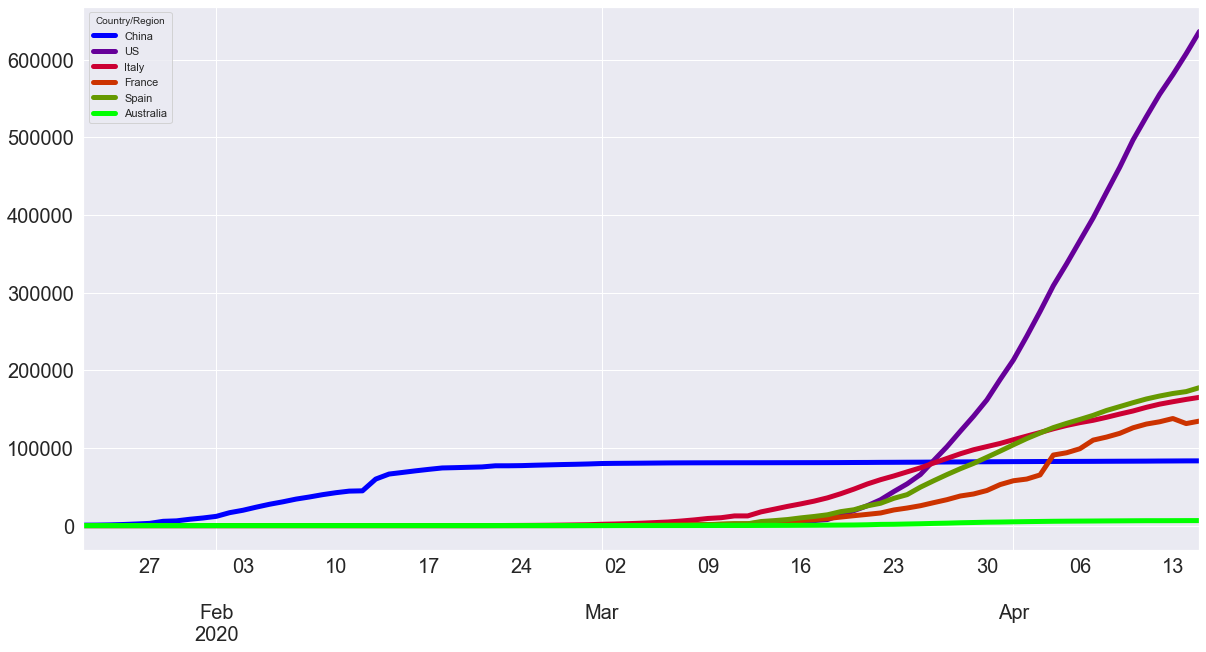

In [188]:
# Plot the time series of several countries of interest
poi = ['China', 'US', 'Italy', 'France', 'Spain','Australia']
confirmed_country[poi].plot(figsize=(20,10), linewidth=5, colormap='brg', fontsize=20)

Let's label our axes and give the figure a title. We'll also thin the line and add points for the data so the sampling is evident in our plots.

Text(0.5, 1.0, 'Reported Confirmed Cases Time Series')

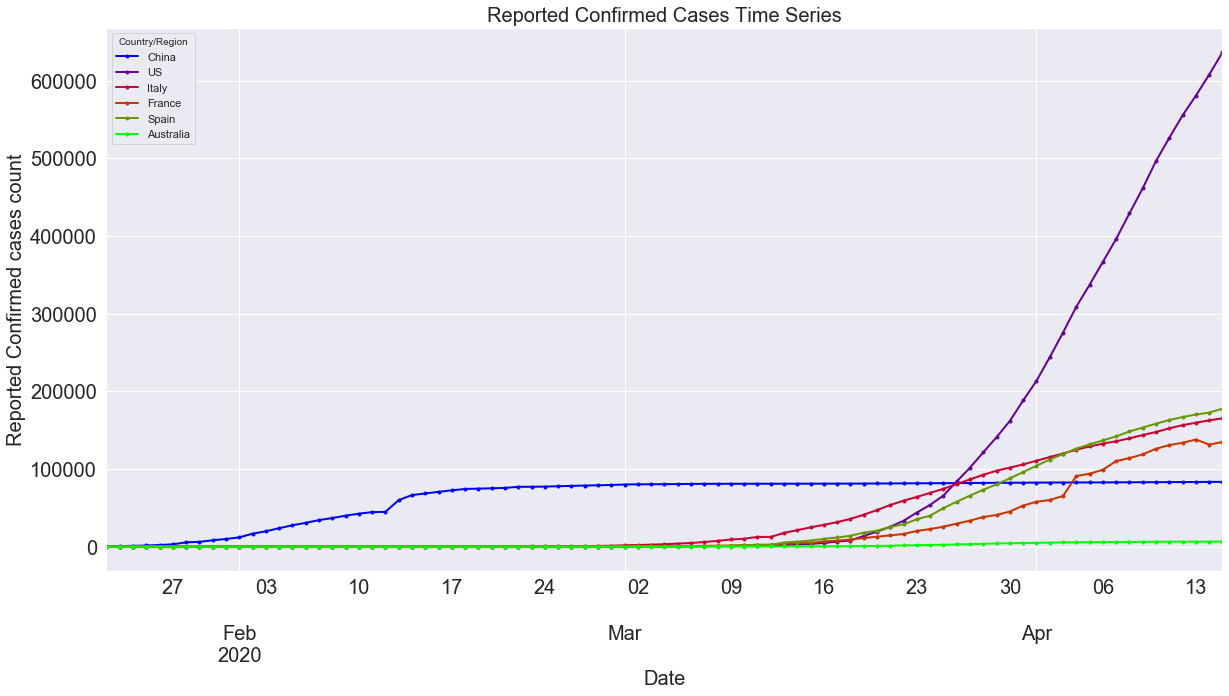

In [189]:
# Plot the time series of several countries of interest
confirmed_country[poi].plot(figsize=(20,10), linewidth=2, marker='.', colormap='brg', fontsize=20)
plt.xlabel('Date', fontsize=20)
plt.ylabel('Reported Confirmed cases count', fontsize=20)
plt.title('Reported Confirmed Cases Time Series', fontsize=20)

Let's do this again but make the y-axis logarithmic:

Text(0.5, 1.0, 'Reported Confirmed Cases Logarithmic Time Series')

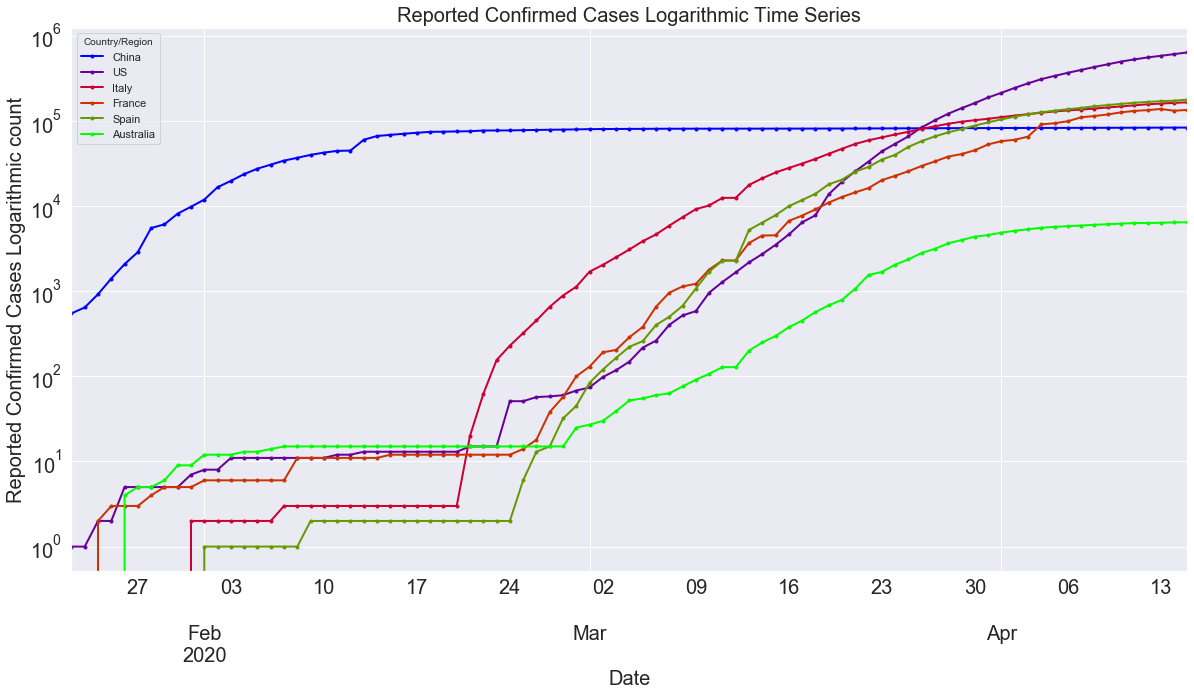

In [190]:
# Plot time series of several countries of interest
confirmed_country[poi].plot(figsize=(20,10), linewidth=2, marker='.', colormap='brg', fontsize=20, logy=True)
plt.xlabel('Date', fontsize=20)
plt.ylabel('Reported Confirmed Cases Logarithmic count', fontsize=20)
plt.title('Reported Confirmed Cases Logarithmic Time Series', fontsize=20)

**Discuss:** Why do we plot with a log y-axis? How do we interpreat the log plot? **Key Points:**
- If a variable takes on values over several orders of magnitude (eg in the 10s, 100s, 1000s) we use log axes so that the data is not crammed into a small region of the visualization.
- If a curve is approximately linear on a log axis, then it's approximately exponential growth and the gradient/slope of the line tells us the exponent.

**Essential Point:** A logarithm scale is good for visualization **BUT** remember, in the thoughtful words of Justin Bois, "on the ground, in the hospitals, we live in the linear scale. The flattening of the US curve, for example is more evident on the log scale, but the growth is still rapid on a linear scale, which is what we feel."

# Number of reported deaths

As we did above for `raw_data_confirmed`, let's check out the head and the info of the `raw_data_deaths` dataframe.

In [191]:
raw_data_deaths.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/6/20,4/7/20,4/8/20,4/9/20,4/10/20,4/11/20,4/12/20,4/13/20,4/14/20,4/15/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,11,14,14,15,15,18,18,21,23,25
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,21,22,22,23,23,23,23,23,24,25
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,173,193,205,235,256,275,293,313,326,336
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,21,22,23,25,26,26,29,29,31,33
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,2,2,2,2,2,2,2,2,2,2


In [192]:
raw_data_deaths.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264 entries, 0 to 263
Data columns (total 89 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Province/State  82 non-null     object 
 1   Country/Region  264 non-null    object 
 2   Lat             264 non-null    float64
 3   Long            264 non-null    float64
 4   1/22/20         264 non-null    int64  
 5   1/23/20         264 non-null    int64  
 6   1/24/20         264 non-null    int64  
 7   1/25/20         264 non-null    int64  
 8   1/26/20         264 non-null    int64  
 9   1/27/20         264 non-null    int64  
 10  1/28/20         264 non-null    int64  
 11  1/29/20         264 non-null    int64  
 12  1/30/20         264 non-null    int64  
 13  1/31/20         264 non-null    int64  
 14  2/1/20          264 non-null    int64  
 15  2/2/20          264 non-null    int64  
 16  2/3/20          264 non-null    int64  
 17  2/4/20          264 non-null    int

It seems to be structured similaryly to `raw_data_confirmed`. I have checked it out in detail and can confirm that it is this! This is good data design and it means that users can explore, munge and visualize it in a fashion analogous to the above. Can you remember what we did? We:

- Split-Apply-Combined it (and it dropped 'Lat'/'Long')
- Transposed it
- Made the index a DateTimeIndex and
- Visualized it (linear and semi-long)

Let's now do the first three steps here for `raw_data_deaths` and see how we go:

# Number of reported deaths by country

In [193]:
# Split-Apply-Combine
deaths_country = raw_data_deaths.groupby(['Country/Region']).sum().drop(['Lat','Long'], axis=1)

# Transpose
deaths_country = deaths_country.transpose()

# Set index as DateTimeIndex
datetime_index = pd.DatetimeIndex(deaths_country.index)
deaths_country.set_index(datetime_index,inplace=True)

# Check out the head
deaths_country.head()

Country/Region,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,...,United Kingdom,Uruguay,Uzbekistan,Venezuela,Vietnam,West Bank and Gaza,Western Sahara,Yemen,Zambia,Zimbabwe
2020-01-22,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-01-23,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-01-24,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-01-25,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-01-26,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [194]:
# Check out the index
deaths_country.index

DatetimeIndex(['2020-01-22', '2020-01-23', '2020-01-24', '2020-01-25',
               '2020-01-26', '2020-01-27', '2020-01-28', '2020-01-29',
               '2020-01-30', '2020-01-31', '2020-02-01', '2020-02-02',
               '2020-02-03', '2020-02-04', '2020-02-05', '2020-02-06',
               '2020-02-07', '2020-02-08', '2020-02-09', '2020-02-10',
               '2020-02-11', '2020-02-12', '2020-02-13', '2020-02-14',
               '2020-02-15', '2020-02-16', '2020-02-17', '2020-02-18',
               '2020-02-19', '2020-02-20', '2020-02-21', '2020-02-22',
               '2020-02-23', '2020-02-24', '2020-02-25', '2020-02-26',
               '2020-02-27', '2020-02-28', '2020-02-29', '2020-03-01',
               '2020-03-02', '2020-03-03', '2020-03-04', '2020-03-05',
               '2020-03-06', '2020-03-07', '2020-03-08', '2020-03-09',
               '2020-03-10', '2020-03-11', '2020-03-12', '2020-03-13',
               '2020-03-14', '2020-03-15', '2020-03-16', '2020-03-17',
      

# Plotting number of reported deaths by country

Let's now visualize the number of reported deaths:

Text(0.5, 1.0, 'Reported Deaths Time Series')

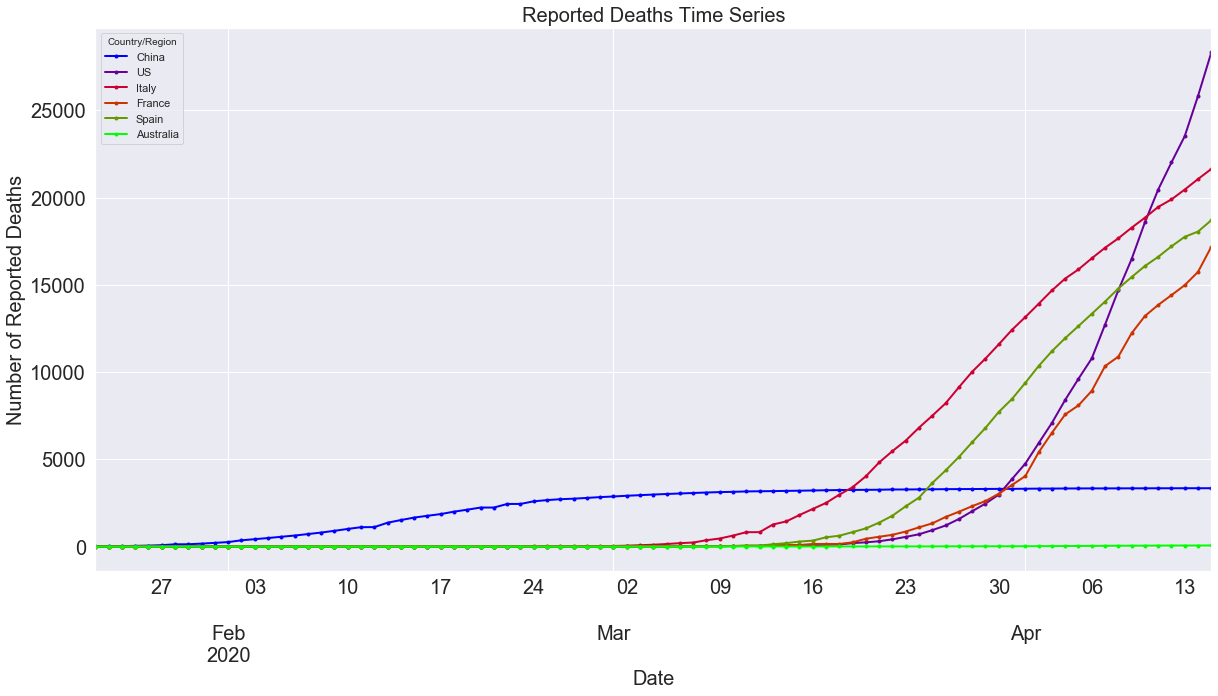

In [195]:
# Plot time series of several countries of interest
deaths_country[poi].plot(figsize=(20,10), linewidth=2, marker='.', colormap='brg', fontsize=20)
plt.xlabel('Date', fontsize=20)
plt.ylabel('Number of Reported Deaths', fontsize=20)
plt.title('Reported Deaths Time Series', fontsize=20)

Now on a semi-log plot

Text(0.5, 1.0, 'Reported Deaths Time Series')

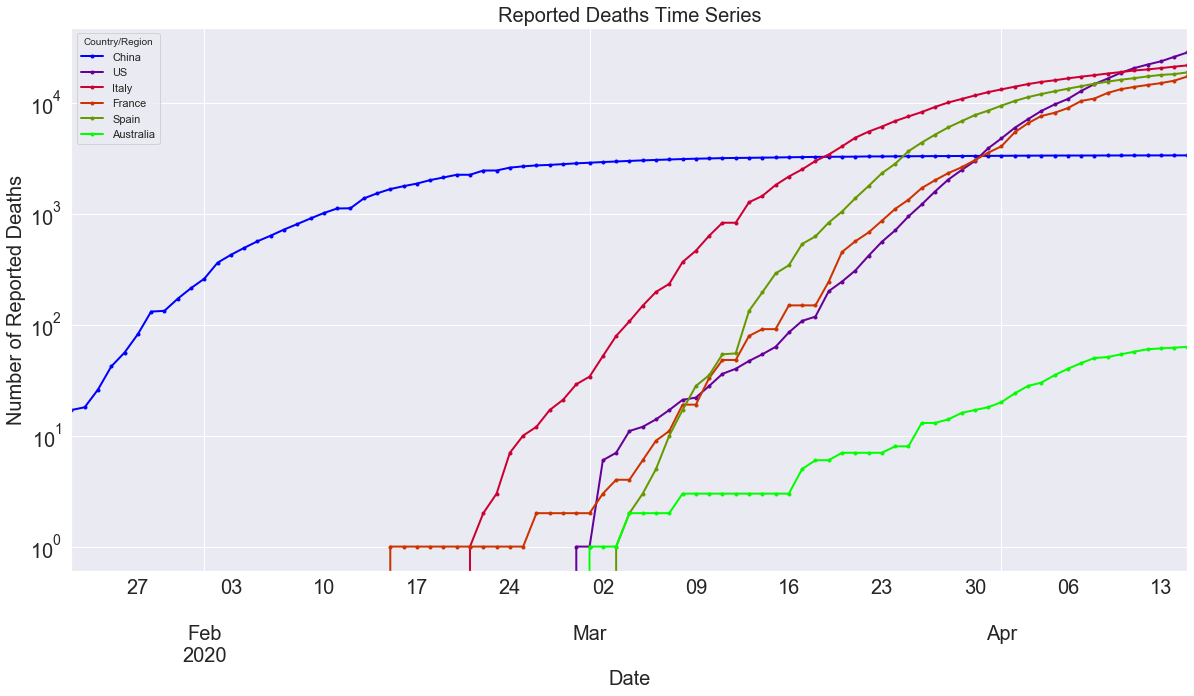

In [196]:
# Plot a time series of several countries of interest
deaths_country[poi].plot(figsize=(20,10), linewidth=2, marker='.', fontsize=20, colormap='brg', logy=True)
plt.xlabel('Date', fontsize=20)
plt.ylabel('Number of Reported Deaths', fontsize=20)
plt.title('Reported Deaths Time Series', fontsize=20)

# Aligning growth curves to start with day of number of known deaths ≥ 25

To compare what's happening in diffrerent countries, we can align each country's growth curves to all start on the day when the number of known deaths ≥ 25, such as reported in the first figure. To achieve this, first off, let's set all values less than 25 to NaN so that the associated data points don't get plotted at all when we visualized the data:

In [197]:
# Loop over the columns & set values < 25 to None
for col in deaths_country.columns:
    deaths_country.loc[(deaths_country[col] < 25), col] = None
    
# Check out tail
deaths_country.tail()

Country/Region,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,...,United Kingdom,Uruguay,Uzbekistan,Venezuela,Vietnam,West Bank and Gaza,Western Sahara,Yemen,Zambia,Zimbabwe
2020-04-11,NaN,NaN,275.0,26.0,NaN,NaN,83.0,NaN,57.0,337.0,...,9892.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-04-12,NaN,NaN,293.0,29.0,NaN,NaN,90.0,NaN,60.0,350.0,...,10629.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-04-13,NaN,NaN,313.0,29.0,NaN,NaN,97.0,NaN,61.0,368.0,...,11347.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-04-14,NaN,NaN,326.0,31.0,NaN,NaN,102.0,NaN,62.0,384.0,...,12129.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-04-15,25.0,25.0,336.0,33.0,NaN,NaN,111.0,NaN,63.0,393.0,...,12894.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Now let's plot as above to make sure we see what we think we should see:

Text(0.5, 1.0, 'Reported Deaths Time Series')

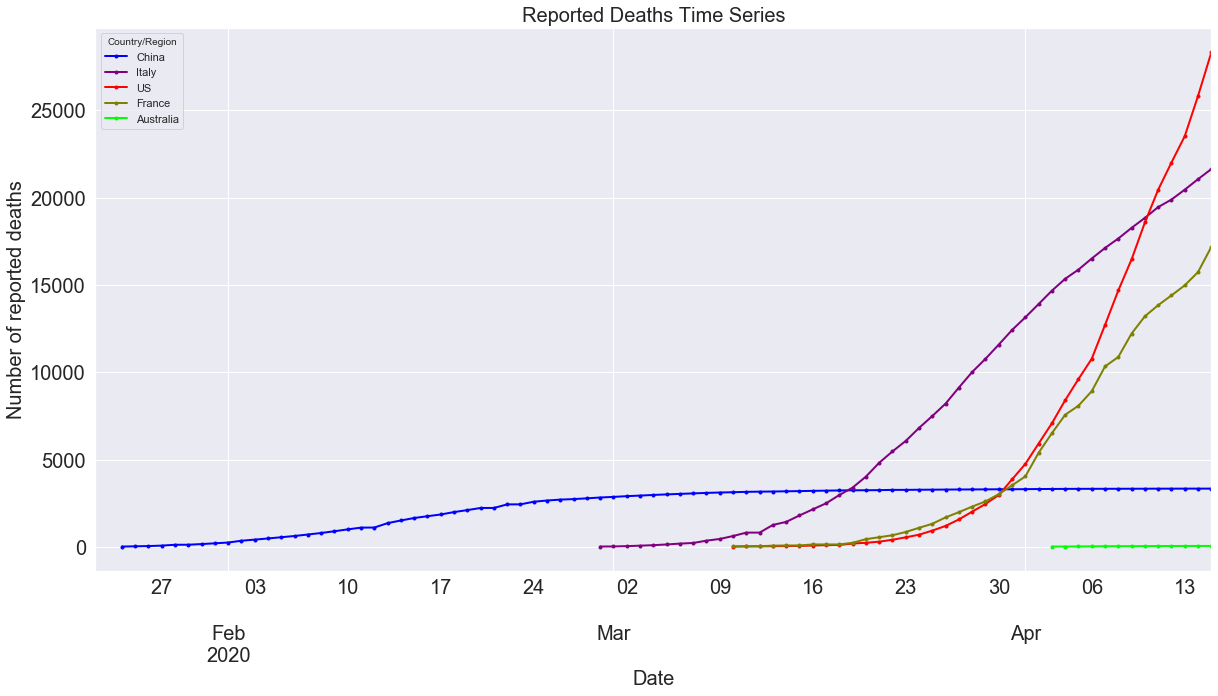

In [198]:
# Plot time series of several countries of interest
poi = ['China', 'Italy', 'US', 'France', 'Australia']
deaths_country[poi].plot(figsize=(20,10), linewidth=2, marker='.', colormap='brg', fontsize=20)
plt.xlabel('Date', fontsize=20)
plt.ylabel('Number of reported deaths', fontsize=20)
plt.title('Reported Deaths Time Series', fontsize=20)

The countries that have seen less than 25 total deaths will have columns of NaNs now so let's drop these and see how many columns we have left

In [199]:
# Drop columns that are all NaNs (i.e countries that haven't yet reached 25 deaths)
deaths_country.dropna(axis=1, how='all', inplace=True)
deaths_country.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 85 entries, 2020-01-22 to 2020-04-15
Data columns (total 73 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Afghanistan             1 non-null      float64
 1   Albania                 1 non-null      float64
 2   Algeria                 21 non-null     float64
 3   Andorra                 7 non-null      float64
 4   Argentina               16 non-null     float64
 5   Australia               13 non-null     float64
 6   Austria                 23 non-null     float64
 7   Bangladesh              6 non-null      float64
 8   Belarus                 4 non-null      float64
 9   Belgium                 27 non-null     float64
 10  Bolivia                 3 non-null      float64
 11  Bosnia and Herzegovina  10 non-null     float64
 12  Brazil                  25 non-null     float64
 13  Bulgaria                6 non-null      float64
 14  Burkina Faso            

As we're going to align the countries from the day they first had at least 25 deaths, we won't need the DateTimeIndex. In fact, we won't need the date at all. So we can:

- Reset the index, which will give us an ordinal index (which turns the date into a regular column) and
- Drop the date column (which is called index) after the reset

In [200]:
# Sort indes, drop date column
deaths_country_drop = deaths_country.reset_index().drop(['index'], axis=1)
deaths_country_drop.head()

Country/Region,Afghanistan,Albania,Algeria,Andorra,Argentina,Australia,Austria,Bangladesh,Belarus,Belgium,...,Spain,Sweden,Switzerland,Thailand,Tunisia,Turkey,US,Ukraine,United Arab Emirates,United Kingdom
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Now it's time to shift each column so that the first entry is the first NaN value that it contains! To do this we can use the `shift()` method on each column. How do we shift each column though? The magnitude of the shift is given by how many NaNs there are at the start of the column, which we can retrieve using the `first_valid_index()` method on the column **but** we can shift **up**, which is negative in direction (by convection and perhaps intuition). So let's do it.  

In [201]:
# Shift
for col in deaths_country_drop.columns:
    deaths_country_drop[col] = deaths_country_drop[col].shift(-deaths_country_drop[col].first_valid_index())
    
# Check out head
deaths_country_drop.head()

Country/Region,Afghanistan,Albania,Algeria,Andorra,Argentina,Australia,Austria,Bangladesh,Belarus,Belgium,...,Spain,Sweden,Switzerland,Thailand,Tunisia,Turkey,US,Ukraine,United Arab Emirates,United Kingdom
0,25.0,25.0,25.0,25.0,27.0,28.0,28.0,27.0,26.0,37.0,...,28.0,25.0,27.0,26.0,25.0,30.0,28.0,27.0,25.0,56.0
1,NaN,NaN,26.0,26.0,28.0,30.0,30.0,30.0,29.0,67.0,...,35.0,36.0,28.0,27.0,25.0,37.0,36.0,32.0,28.0,56.0
2,NaN,NaN,29.0,26.0,36.0,35.0,49.0,34.0,33.0,75.0,...,54.0,62.0,41.0,30.0,28.0,44.0,40.0,37.0,33.0,72.0
3,NaN,NaN,31.0,29.0,39.0,40.0,58.0,39.0,36.0,88.0,...,55.0,77.0,54.0,32.0,31.0,59.0,47.0,38.0,NaN,138.0
4,NaN,NaN,35.0,29.0,43.0,45.0,68.0,46.0,NaN,122.0,...,133.0,105.0,75.0,33.0,34.0,75.0,54.0,45.0,NaN,178.0


**Side note:** Instead of looping over columns, we could have applied a lambda function to the columns of the dataframe, as follows:

In [202]:
# Shift using lambda function
# deaths_country = deaths_country.apply(lambda x: x.shift(-x.first_valid_index()))

Now we get to plot our time series, first with linear axes, then semi-log:

Text(0.5, 1.0, 'Total reported coronavirus deaths for places with at least 25 deaths')

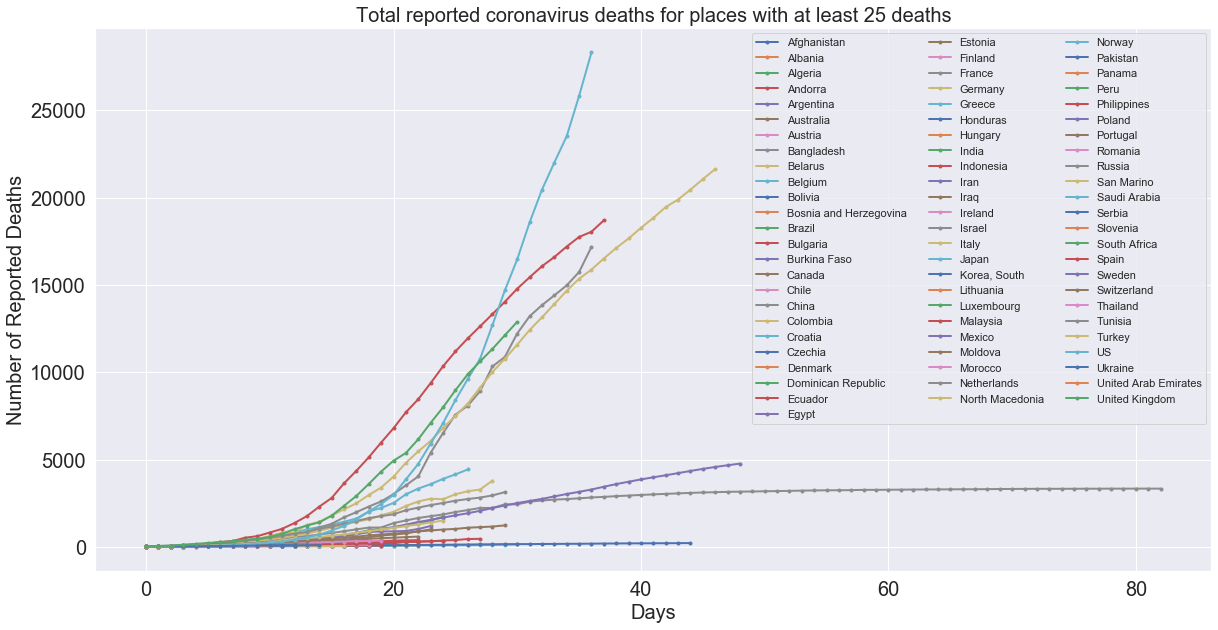

In [203]:
# Plot time series
ax = deaths_country_drop.plot(figsize=(20,10), linewidth=2, marker='.', fontsize=20)
ax.legend(ncol=3, loc='upper right')
plt.xlabel('Days', fontsize=20)
plt.ylabel('Number of Reported Deaths', fontsize=20)
plt.title('Total reported coronavirus deaths for places with at least 25 deaths', fontsize=20)

Text(0.5, 1.0, 'Total reported coronavirus deaths for places with at least 25 deaths')

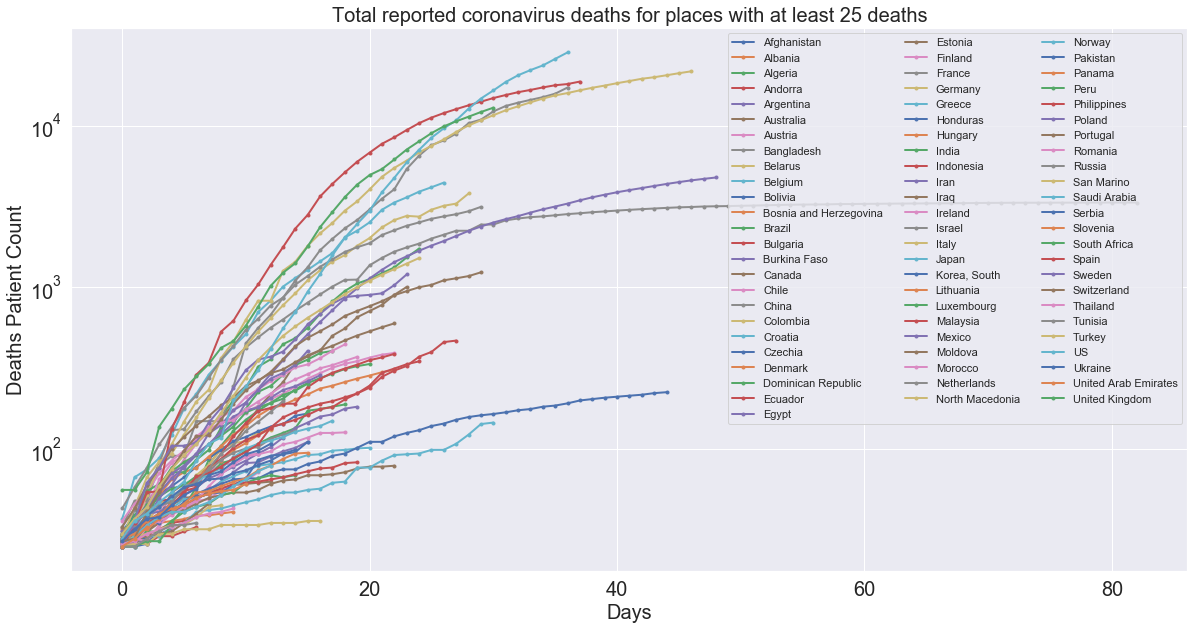

In [204]:
# Plot semi-log time series
ax = deaths_country_drop.plot(figsize=(20,10), linewidth=2, marker='.', fontsize=20, logy=True)
ax.legend(ncol=3, loc='upper right')
plt.xlabel('Days', fontsize=20)
plt.ylabel('Deaths Patient Count', fontsize=20)
plt.title('Total reported coronavirus deaths for places with at least 25 deaths', fontsize=20)

**Note:** Although we have managed to plot what we wanted, the above plots are challenging to retrieve any meaningful information from. There are too many growth curves so that it's very crowded **and** too many colors look the same so it's difficult to tell which country is from which legend. Below, we'll plot less curves and further down the notebook we will use the python package Altair to introduce interactivity into the plot in order to deal with this challenge.

Text(0.5, 1.0, 'Total reported coronavirus deaths for places with at least 25 deaths')

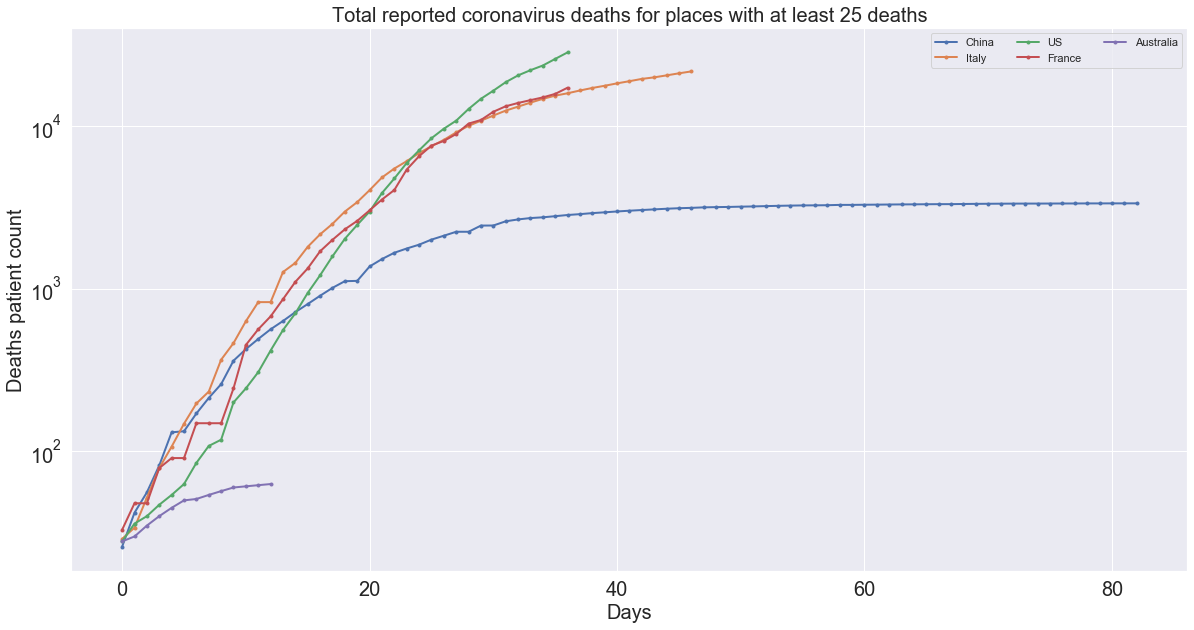

In [205]:
# Plot semi log time series
ax = deaths_country_drop[poi].plot(figsize=(20,10), linewidth=2, marker='.', fontsize=20, logy=True)
ax.legend(ncol=3, loc='upper right')
plt.xlabel('Days', fontsize=20)
plt.ylabel('Deaths patient count', fontsize=20)
plt.title('Total reported coronavirus deaths for places with at least 25 deaths', fontsize=20)

**Summary:** We've
- Looked at the dataset containing the number of reported deaths for each region.
- Wrangled the data to look at the number of reported deaths by country.
- Plotted the number of reported deaths by country (both log and semi-log)
- Aligned growth curves to start with the day of number of known deaths ≥ 25.

# Plotting number of recovered people

The third dataset in the Hopkinson repository is the number of recovered. We want to do similar data wrangling as in the two cases above so we *could* copy and paste our code again *but*, if you're writing the same code three times, it's likely to write a function.

In [206]:
# Function for grouping countries by region
def group_by_country(raw_data):
    """Returns data for countries indexed by date"""
    # Group by
    data = raw_data.groupby(['Country/Region']).sum().drop(['Lat', 'Long'], axis=1)
    # Transpose
    data = data.transpose()
    # Set index as DateTimeIndex
    datetime_index = pd.DatetimeIndex(data.index)
    data.set_index(datetime_index, inplace=True)
    return data

In [207]:
# Function to align growth curves
def align_curves(data, min_val):
    """Align growth curves  to start on the day when the number of known deaths = min_val"""
    # Loop over columns & set values < min_val to None
    for col in data.columns:
        data.loc[(data[col] < min_val),col] = None
    # Drop columns with all NaNs
    data.dropna(axis=1, how='all', inplace=True)
    # Reset index, drop date
    data = data.reset_index().drop(['index'], axis=1)
    # Shift each column to begin with first valid index
    for col in data.columns:
        data[col] = data[col].shift(-data[col].first_valid_index())
    return data

In [210]:
# Function to plot time series
def plot_time_series(df, plot_title, x_label, y_label, logy=False):
    """Plot the time series and make it look nice"""
    ax = df.plot(figsize=(20,10), linewidth=2, marker='.', fontsize=10, logy=logy)
    ax.legend(ncol=3, loc='lower right')
    plt.xlabel(x_label, fontsize=20)
    plt.ylabel(y_label, fontsize=20)
    plt.title(plot_title, fontsize=20)

For a sanity check, let's see the function at work on the 'number of deaths' data:

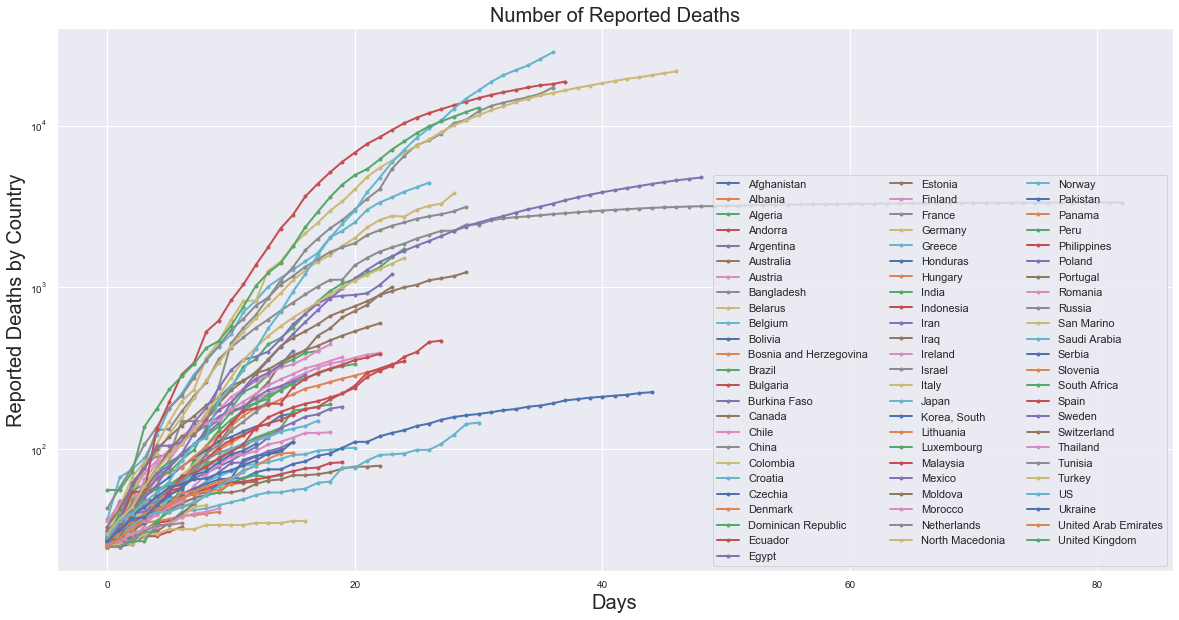

In [211]:
deaths_country_drop = group_by_country(raw_data_deaths)
deaths_country_drop = align_curves(deaths_country_drop, min_val=25)
plot_time_series(deaths_country_drop, 'Number of Reported Deaths', 'Days', 'Reported Deaths by Country', logy=True)

Now let's check use our functions to group, wrangle, and plot recovered patients data

In [212]:
# Group by country and check out tail
recovered_country = group_by_country(raw_data_recovered)
recovered_country.tail()

Country/Region,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,...,United Kingdom,Uruguay,Uzbekistan,Venezuela,Vietnam,West Bank and Gaza,Western Sahara,Yemen,Zambia,Zimbabwe
2020-04-11,32,197,460,71,4,0,440,173,1806,6604,...,622,214,42,93,144,57,0,0,28,0
2020-04-12,32,217,591,128,4,0,468,197,1806,6987,...,626,231,66,93,144,58,0,0,30,0
2020-04-13,32,232,601,128,4,0,515,211,1806,7343,...,304,231,85,110,146,58,0,0,30,0
2020-04-14,40,248,691,128,5,3,559,265,2186,7633,...,323,248,99,110,169,62,0,0,30,0
2020-04-15,43,251,708,169,5,3,596,297,2186,8098,...,368,260,107,111,171,63,0,0,30,1


In [213]:
# Align curves and check out the head
recovered_country_drop = align_curves(recovered_country, min_val=25)
recovered_country_drop.head()

Country/Region,Afghanistan,Albania,Algeria,Andorra,Argentina,Armenia,Australia,Austria,Azerbaijan,Bahrain,...,US,Ukraine,United Arab Emirates,United Kingdom,Uruguay,Uzbekistan,Venezuela,Vietnam,West Bank and Gaza,Zambia
0,29.0,31.0,32.0,26.0,52.0,28.0,26.0,112.0,26.0,35.0,...,105.0,25.0,26.0,53.0,41.0,25.0,31.0,25.0,25.0,25.0
1,32.0,31.0,32.0,31.0,52.0,30.0,26.0,225.0,26.0,35.0,...,121.0,28.0,31.0,67.0,41.0,25.0,39.0,55.0,NaN,28.0
2,32.0,33.0,32.0,39.0,63.0,30.0,26.0,225.0,26.0,44.0,...,147.0,28.0,31.0,67.0,62.0,25.0,39.0,58.0,42.0,30.0
3,32.0,44.0,65.0,52.0,72.0,30.0,88.0,479.0,26.0,44.0,...,176.0,28.0,38.0,67.0,68.0,30.0,39.0,63.0,44.0,30.0
4,32.0,52.0,65.0,58.0,72.0,30.0,88.0,636.0,32.0,60.0,...,178.0,35.0,38.0,67.0,93.0,30.0,39.0,75.0,44.0,30.0


Plot time series

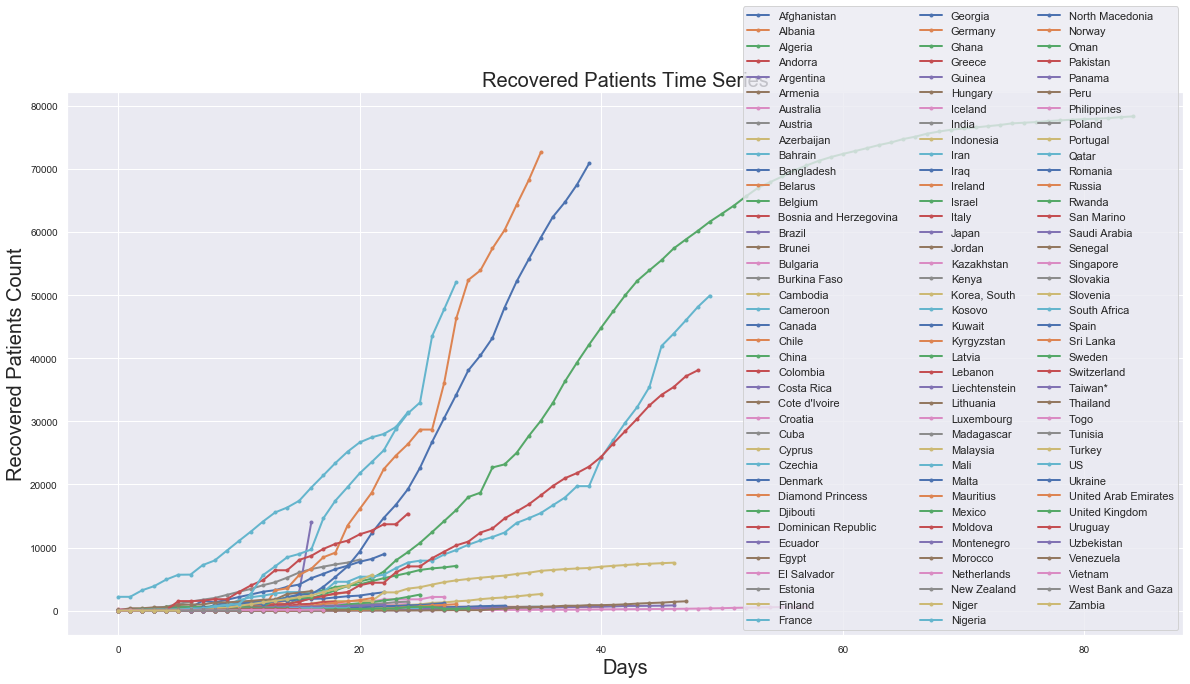

In [214]:
plot_time_series(recovered_country_drop, 'Recovered Patients Time Series', 'Days', 'Recovered Patients Count')

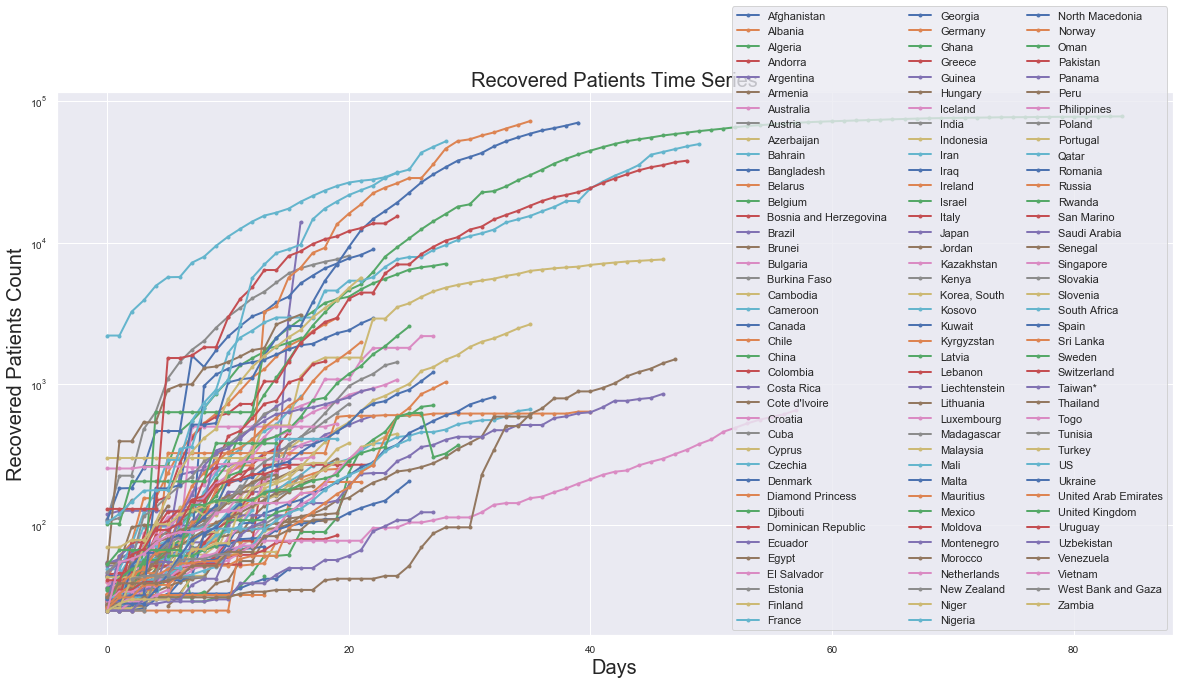

In [215]:
plot_time_series(recovered_country_drop, 'Recovered Patients Time Series', 'Days', 'Recovered Patients Count', logy=True)

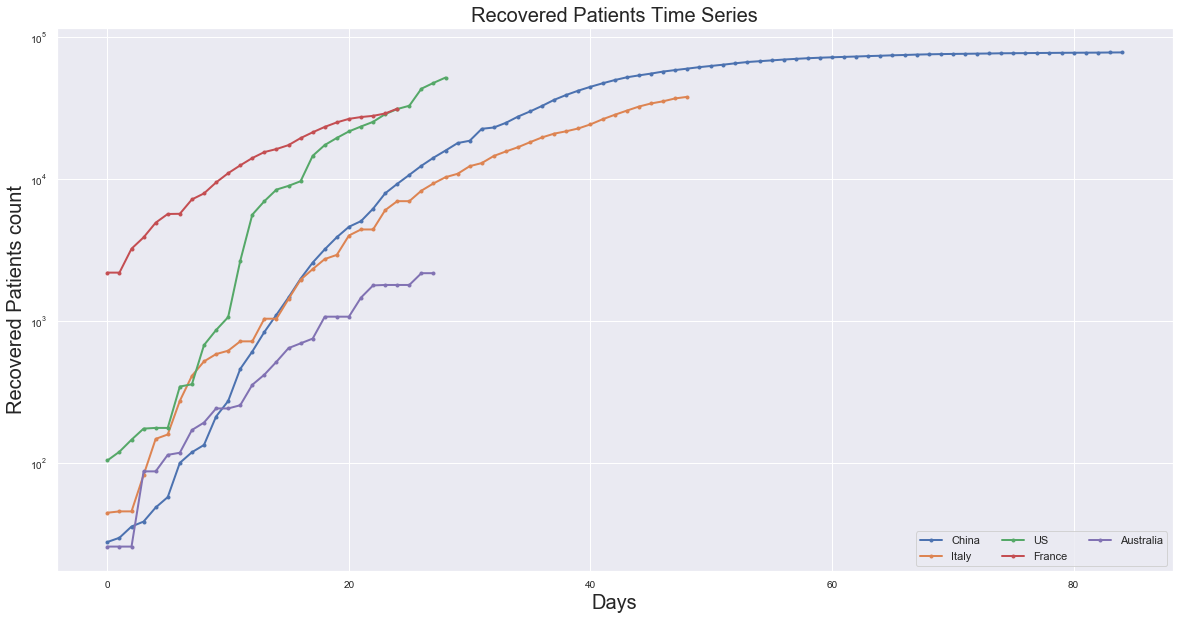

In [216]:
plot_time_series(recovered_country_drop[poi], 'Recovered Patients Time Series', 'Days', 'Recovered Patients count', True)